### 第4天：TensorFlow2建立模型的三种方式之Sequential API

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
print('tensorflow版本：', tf.__version__)

tensorflow版本： 2.1.0


**tf.keras**提供**[Sequential API](https://tensorflow.google.cn/versions/r2.2/api_docs/python/tf/keras/Sequential)**(Sequential按层顺序创建模型 )，这种方式比较简单。下面对手写数字数据集mnist建立基于MLP(多层感知机)的分类模型。

### 1、数据准备

In [31]:
# 引入数据集，该数据集的获取方式已经集成，直接引入后，会自动下载数据集
from tensorflow.keras.datasets import mnist
mnistdata = mnist.load_data()

mnist数据集分为两部分，前一部分是训练数据集，数据条数60000条，数据包括训练特征、训练标签；后一部分是测试数据集，数据条数10000条，数据包括测试特征、测试标签。其中每一条特征数据是一个维度为(28, 28)的矩阵，代表一张黑白的图片；标签数据就是该图片中的数字。

In [32]:
(train_features, train_labels), (test_features, test_labels) = mnistdata
print('训练数据集')
print('特征：类型{}, 维度{}'.format(type(train_features), train_features.shape))
print('标签：类型{}, 维度{}'.format(type(train_labels), train_labels.shape))
print('测试数据集')
print('特征：类型{}, 维度{}'.format(type(test_features), test_features.shape))
print('标签：类型{}, 维度{}'.format(type(test_labels), test_labels.shape))

训练数据集
特征：类型<class 'numpy.ndarray'>, 维度(60000, 28, 28)
标签：类型<class 'numpy.ndarray'>, 维度(60000,)
测试数据集
特征：类型<class 'numpy.ndarray'>, 维度(10000, 28, 28)
标签：类型<class 'numpy.ndarray'>, 维度(10000,)


数据维度： (28, 28)


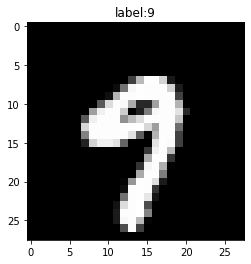

In [33]:
# 需要安装matplotlib：打开Anaconda Prompt，激活环境(activate tf2)，安装matplotlib(conda install matplotlib)
%matplotlib inline
from matplotlib import pyplot as plt

# 显示index为n的数据
def showfig(features, label, n):
    plt.title('label:{}'.format(label[n]))
    figdata = features[n]
    print('数据维度：', figdata.shape)
    plt.imshow(figdata, 'gray')  # 因为原始数据是(28, 28)的，只有一个通道，所以是黑白色的

showfig(train_features, train_labels, 1122)

In [34]:
# 看下训练数据中的标签的分布
from collections import Counter
print('每个数字以及对应的图片个数：\n{}'.format(sorted(Counter(train_labels).items(), key=lambda s:s[0])))

每个数字以及对应的图片个数：
[(0, 5923), (1, 6742), (2, 5958), (3, 6131), (4, 5842), (5, 5421), (6, 5918), (7, 6265), (8, 5851), (9, 5949)]


因为是构建MLP模型，需要对数据进行归一化。因为图片的数字矩阵中的数字类型是无符号8位整数 uint8最大值为255，因此归一化需要除以255，也就是将数值变为[0, 1]范围内的数字。

In [35]:
# 归一化
trainfeatures = train_features / 255
testfeatures = test_features / 255

### 2、 Sequential按层顺序创建模型 

下面给出MLP模型的一些参数：

In [36]:
Epoch = 100  # 模型迭代的次数
Batch_Size = 128  # 批量训练的样本的个数
Out_Class = 10  # 输出的类别的个数,0-9共10类

### 2.1.  构建模型

利用Sequential构建模型，就是像搭积木一样，按照层顺序建立模型。对于MLP模型而言，第一层就是输入层，接下来一个或者多个隐层，最后是输出层。实现方式可以通过下面的 **.add** 实现，也可以通过列表形式实现。利用**tf.keras.models.Sequential.Dense()** 构建全连接层。

**tf.keras.layers.Dense(
    units, activation=None, use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None,
    activity_regularizer=None, kernel_constraint=None, bias_constraint=None,
    **kwargs
)**

该层神经单元的个数units；激活函数activation，比较常用的linear,softmax,tanh,sigmoid,sinh,relu,selu,softplus等，需要根据输出来确定用哪个激活函数比较合适；是否添加偏置use_bias，默认为True，相当于线性回归中的b；权重的初始化kernel_initializer，选择合适的有利于获得成本函数的最优值；偏置的初始化bias_initializer；权重、偏置的正则化kernel_regularizer，bias_regularizer，有助于防止过拟合；

In [37]:
# 实现一：通过.add方式添加

def build_model_1(name='python_fan'):  # name:模型的名称
    # 首先定义一个Sequential
    model = tf.keras.models.Sequential(name=name)

    # 添加输入层：平铺，也就是将每条维度为(28, 28)的数据变为(28*28=784,)的。
    model.add(keras.layers.Flatten(input_shape=(28, 28), name='transpose_1'))

    # 添加第一个隐层：全连接，128表示该层神经元的个数
    model.add(keras.layers.Dense(128, name='hidden_layer_1', activation='relu', kernel_initializer='glorot_normal'))
    # 添加第二个隐层：全连接，256表示该层神经元的个数
    model.add(keras.layers.Dense(256, name='hidden_layer_2', activation='relu'))

    # 添加输出层：全连接
    model.add(keras.layers.Dense(Out_Class, name='hidden_layer_3', activation='softmax'))
    return model

model = build_model_1('sequential_1')
# 模型结构描述
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
transpose_1 (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 128)               100480    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               33024     
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [38]:
# 实现二:列表形式
def build_model_2(name='python_fan'):  # name:模型的名称
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28), name='transpose_1'),  # 输入层
        keras.layers.Dense(128, name='hidden_layer_1', activation='relu'), # 隐层1
        keras.layers.Dense(256, name='hidden_layer_2', activation='relu'), # 隐层2
        keras.layers.Dense(Out_Class, name='hidden_layer_3', activation='softmax') # 输出层
        ], name=name)
    return model
model = build_model_2('sequential_2')
# 模型结构描述
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
transpose_1 (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 128)               100480    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               33024     
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


参数个数说明：
 + transpose_1：不涉及参数
 + hidden_layer_1：$100480 = 784 \times 128 + 128$
 + hidden_layer_2：$33024= 128 \times 256 + 256$
 + hidden_layer_3：$2570= 256 \times 10 + 10$
 + Total params：$136074=100480+33024+2570$

### 2.2  模型编译 **tf.keras.models.Sequential.compile()**

**compile(optimizer='rmsprop', loss=None, metrics=None, loss_weights=None,sample_weight_mode=None, weighted_metrics=None, **kwargs)**

设置求解模型参数的优化器optimizer，包括Adadelta，Adagrad，Adam，Adamax，Ftrl，Nadam，RMSprop，Sgd等；损失函数loss，回归问题一般采用MSE；分类问题可采用categorical_crossentropy，sparse_categorical_crossentropy，binary_crossentropy；用于监控训练，输出当前模型metrics中的指标，例如分类问题的准确率accuracy，回归问题中的mse。

In [39]:
# 模型编译
model.compile(optimizer='Sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])  

# 或者将字符串写成函数的形式，这种方式可以更改优化器的参数，例如学习率之类的
"""
# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0), 
loss=tf.keras.losses.CategoricalCrossentropy(),metrics=[tf.keras.metrics.CategoricalAccuracy()]) 
"""
# 标签数据要进行one-hot编码，因为loss设置的是categorical_crossentropy，如果设置的是sparse_categorical_crossentropy，则不需要下面的转化。
train_label_cate = tf.keras.utils.to_categorical(train_labels, Out_Class)
testlabels = tf.keras.utils.to_categorical(test_labels, Out_Class)

### 2.3 模型回调保存 **tf.keras.callbacks.ModelCheckpoint()**

**tf.keras.callbacks.ModelCheckpoint(
    filepath, monitor='val_loss', verbose=0, save_best_only=False,
    save_weights_only=False, mode='auto', save_freq='epoch', **kwargs
)**

可以使用训练好的模型而无需从头开始重新训练，或在打断的地方开始训练，以防止训练过程没有保存。

保存的文件名filepath，文件名可自定义为迭代次数或者训练中的指标值，例如**para.{epoch:03d}-{val_accuracy:.5f}.ckpt**；参数monitor和参数mode是对应设置的，如果前者为误差成本，后者就设置为最小；前者为准确率，后者就设置为最大或者自动。save_best_only如果设置为True，并且文件名是自定义的，则新的文件会覆盖旧的文件；如果名称包含自定义的，则不会覆盖；如果设置为Fasle，则会全部保留；




In [40]:
import os
# 在文件名中包含 epoch (使用 `str.format`)
checkpoint_path = "./cp-{val_accuracy:.5f}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 创建一个回调，保证验证数据集准确率最大
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=2,
    save_best_only=True)

### 2.4  模型训练 **tf.keras.models.Sequential.fit()**

**fit(
    x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
    validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_batch_size=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False, **kwargs
)**

设置特征数据x，输出数据y，批量训练中一次训练输入的数据条数batch_size，循环的次数epochs，训练过程中如何输出训练数据和验证数据的模型的评估数据verbose，0是不输出，1是进度条输出，2是一次训练输出一次，建议值2；验证数据集占特征数据的比例validation_split，如果给出了验证数据集validation_data，则值设置为0。是否随机打乱数据集shuffle，默认为True。


In [43]:
# 训练模型
model.fit(trainfeatures, train_label_cate, batch_size=Batch_Size, \
          epochs=Epoch, verbose=2, validation_split=0.1, callbacks=[cp_callback])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100

Epoch 00001: val_accuracy did not improve from 0.97783
54000/54000 - 1s - loss: 0.0656 - accuracy: 0.9817 - val_loss: 0.0821 - val_accuracy: 0.9775
Epoch 2/100

Epoch 00002: val_accuracy did not improve from 0.97783
54000/54000 - 1s - loss: 0.0645 - accuracy: 0.9822 - val_loss: 0.0815 - val_accuracy: 0.9778
Epoch 3/100

Epoch 00003: val_accuracy improved from 0.97783 to 0.97833, saving model to ./cp-0.97833.ckpt
54000/54000 - 1s - loss: 0.0636 - accuracy: 0.9825 - val_loss: 0.0808 - val_accuracy: 0.9783
Epoch 4/100

Epoch 00004: val_accuracy improved from 0.97833 to 0.97867, saving model to ./cp-0.97867.ckpt
54000/54000 - 1s - loss: 0.0628 - accuracy: 0.9827 - val_loss: 0.0806 - val_accuracy: 0.9787
Epoch 5/100

Epoch 00005: val_accuracy did not improve from 0.97867
54000/54000 - 1s - loss: 0.0618 - accuracy: 0.9831 - val_loss: 0.0806 - val_accuracy: 0.9777
Epoch 6/100

Epoch 00006: val_accuracy did not improve from 0.97867


### 2.5 模型评估 **tf.keras.models.Sequential.evaluate()**

**evaluate(
    x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None,
    callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False,
    return_dict=False
)**

设置测试的特征数据x；测试对应的输出数据y；其中两种数据的格式要和训练的数据保持一致，只允许样本数可以不同；callbacks设置对哪个已经保存的模型进行评估。

In [46]:
# 评估模型,按照模型最后的参数计算
test_loss, test_acc = model.evaluate(testfeatures, testlabels)

print('测试数据集成本：{:.8f},准确率{:.8f}%%'. format(test_loss, 100*test_acc))

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0707 - accuracy: 0.9779
测试数据集成本：0.07070848,准确率97.79000282%%


### 2.6 参数加载 **tf.train.latest_checkpoint()**

   利用**tf.train.latest_checkpoint()** 可以获得最新的保存的参数文件，或者直接使用保存的参数文件名称，然后用 **.load_weights**来读取保存的参数。

In [48]:
# 6. 参数加载
# 新的模型结构保持一致。
model_new = build_model_2('sequential_new')
# 需要经过编译，参数也要和原来的一致
model_new.compile(optimizer='Sgd', loss='categorical_crossentropy', 
              metrics=['accuracy'])
# 此时没有加载已经训练好的参数，也就是根据初始的参数值计算，因为有10类，准确率大概十分之一。
predict_loss, predict_acc = model_new.evaluate(testfeatures, testlabels)
print('使用初始参数','成本:', predict_loss, '准确率', predict_acc)

# 加载已经训练好的参数
best_para = tf.train.latest_checkpoint(checkpoint_dir)
print('最优的参数文件：', best_para)
model_new.load_weights(best_para)
predict_loss, predict_acc = model_new.evaluate(testfeatures, testlabels)
print('使用训练后的参数','成本:', predict_loss, '准确率', predict_acc)


10000/10000 [==============================] - 0s 44us/sample - loss: 2.3192 - accuracy: 0.1082
使用初始参数 成本: 2.319191443634033 准确率 0.1082
最优的参数文件： .\cp-0.98083.ckpt
10000/10000 [==============================] - 0s 32us/sample - loss: 0.0787 - accuracy: 0.9758
使用训练后的参数 成本: 0.07869966647587717 准确率 0.9758


### 3、保存模型

除了上面说的在模型训练中保存模型以外，还可以在模型训练结束后保存模型参数或者整个训练好的模型结构。
+ 3.1 手动保存模型参数 **save_weights**

In [50]:
# 手动保存权重，保存的是最后的参数
model.save_weights('./mnist_4_checkpoint')

# 构建模型
model_save = build_model_1('newmodel')
model_save.load_weights('./mnist_4_checkpoint')

model_save.compile(optimizer='Sgd', loss='categorical_crossentropy', metrics=['accuracy'])  
loss, acc = model_save.evaluate(testfeatures, testlabels)
print('成本:', loss, '准确率', acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.0707 - accuracy: 0.9779
成本: 0.07070848318163771 准确率 0.9779


+ 3.2 保存整个模型结构 **save**

保存整个模型结构，包括参数、结构、配置，这样就可以在不访问原始python代码的情况下使用它。如果使用TensorFlow.js加载它们，可在Web浏览器中训练和运行它们；如果使用TensorFlow Lite，可以在移动设备上运行。

In [51]:
# 保存整个模型到HDF5文件 
model.save('./miaier.h5')
# 加载模型
new_model = keras.models.load_model('./miaier.h5')
new_model.summary()
loss, acc = new_model.evaluate(testfeatures, testlabels)
print('成本:', loss, '准确率', acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
transpose_1 (Flatten)        (None, 784)               0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 128)               100480    
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 256)               33024     
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
10000/10000 [==============================] - 0s 43us/sample - loss: 0.0707 - accuracy: 0.9779
成本: 0.07070848318163771 准确率 0.9779


### 4、模型预测

In [52]:
# 因为没有预测数据，我们在测试数据中选取一部分作为预测数据
predict_features = testfeatures[6:23, :, :]
predict_labels = testlabels[6:23]
output_label = new_model.predict(predict_features)
# 获取每一行中最大数字的索引
digit_label = tf.argmax(output_label, axis=1)
print('输出的数字结果:', digit_label.numpy())
print('真实的数字结果:', tf.argmax(predict_labels, axis=1).numpy())

输出的数字结果: [4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6]
真实的数字结果: [4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6]


### 5、模型优化

下面介绍几种MLP模型优化的方式：


+ 防止过拟合

  + L1/L2正则化：kernel_regularizer=keras.regularizers.l2(0.001)
    + 例如：keras.layers.Dense(128, name='hidden_layer_1', activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))
   
  + 丢弃：添加DropOut层
    + 例如：model.add(keras.layers.Dropout(0.2)) 
   
  + 提前结束训练：在模型的回调中使用
    + callbacks = [tf.keras.callbacks.EarlyStopping(patience=4, monitor='val_loss')]，当验证数据集的成本连续4次不在变化时，就停止训练
   
+ 有助于得到最优解

  + 动态更改学习率：在模型的回调中使用

In [53]:
# 动态更改学习率：在模型的回调中使用
def scheduler(epoch):  # 根据epoch动态更改学习率的参数
    if epoch < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epoch))
callbacks = [tf.keras.callbacks.LearningRateScheduler(scheduler)]